## Final Project by 
### Symbat Takhyrova
### Bagnur Medetbek
### Kairbek Urazalin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

## step 1 — Descriptive statistics.

In [2]:
types = pd.read_csv('types.csv', sep = ';')
codes = pd.read_csv('codes.csv', sep = ';')
transactions = pd.read_csv('transactions.csv', sep = ';')
train = pd.read_csv('train_set.csv', sep = ';')

In [3]:
print(types.info())
types.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              155 non-null    int64 
 1   type_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB
None


,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [4]:
print(codes.info())
codes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              184 non-null    int64 
 1   code_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB
None


,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [5]:
print(transactions.info())
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB
None


,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [6]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  6000 non-null   int64
 1   target     6000 non-null   int64
dtypes: int64(2)
memory usage: 93.9 KB
None


,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


In [7]:
transactions = transactions.merge(train, how = 'left', on = 'client_id')
transactions.head()

,client_id,datetime,code,type,sum,target
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0
1,24567813,377 17:20:40,6011,7010,67377.47,NaN
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0
3,14331004,263 12:57:08,6011,2010,-3368873.66,NaN
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0


In [8]:
transactions.isnull().sum(axis = 0)
#we aren't going to be working with these

client_id        0
datetime         0
code             0
type             0
sum              0
target       38213
dtype: int64

In [9]:
df = transactions[transactions.target.notnull()]
df.head()

,client_id,datetime,code,type,sum,target
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0
5,31421357,398 00:00:00,5411,1110,-1572.14,0.0
6,84826852,423 15:27:55,6010,7070,5654.99,1.0


In [10]:
df.drop_duplicates(inplace = True)

<ipython-input-10-9ce7144259af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [11]:
types.drop(types[types["type_description"]=="н/д"].index, axis=0)
types.drop(types[types["type_description"]=="н/д(нет данных)"].index, axis=0)

#delete null values in types table

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....
5,1210,Покупка. POS Зарубеж.
...,...,...
150,4110,Плата за получение наличных в АТМ.
151,2320,Безналичный перевод денежных средств через POS
152,7040,Перевод на карту (с карты) через POS (в предел...
153,2433,Перевод с карты на счет физ.лица в другом банк...


### step 2.

In [12]:
tip = df[['client_id', 'type']]
tip = tip.groupby(['type'])['client_id'].aggregate('count').reset_index().sort_values('client_id', ascending = False).head()
tip.merge(types, how = 'left', on = 'type')

,type,client_id,type_description
0,1010,21427,Покупка. POS
1,2010,14135,Выдача наличных в АТМ
2,1030,12848,Оплата услуги. Банкоматы
3,1110,12273,Покупка. POS
4,7070,9808,Перевод на карту (с карты) через Мобильный бан...


In [13]:
kod = df[['client_id', 'code']]
kod = kod.groupby(['code'])['client_id'].aggregate('count').reset_index().sort_values('client_id', ascending = False).head()
kod.merge(codes, how = 'left', on = 'code')

,code,client_id,code_description
0,6011,19538,Финансовые институты — снятие наличности автом...
1,6010,14093,Финансовые институты — снятие наличности вручную
2,4814,13042,"Звонки с использованием телефонов, считывающих..."
3,5411,13003,"Бакалейные магазины, супермаркеты"
4,4829,8134,Денежные переводы


In [14]:
#let's calculate the sum of a client's transactions

train_again = pd.DataFrame(train['client_id'])
train_again['net'] = train_again.client_id.apply(lambda x: 1 if df[df.client_id == x]['sum'].sum()>0 else 0)
df = df.merge(train_again, how = 'left', on = 'client_id')
df['net'].value_counts(normalize = True)

#only 25% of clients have a sum positive

0    0.749747
1    0.250253
Name: net, dtype: float64

In [15]:
df['client_id'].nunique()
# there are 6000 unique clients

6000

### step 3.

In [16]:
#cluster in codes category

def cluster_codes(x):
    if x<1000:
        return 'Ветеринарные услуги'
    elif x>=1000 and x<2000:
        return 'Подрядчики'
    elif x>=2000 and x<3000:
        return 'Издательства'  #?
    elif x>=3000 and x<4000:
        return 'Туризм'
    elif x>=4000 and x<5000:
        return 'Услуги'
    elif x>=5000 and x<6000:
        return 'Физические товары'
    elif x>=6000 and x<7000:
        return 'Услуги'
    elif x>=7000 and x<9000:
        return 'Медицина и образование'
    elif x>=9000 and x<10000:
        return 'Правительственные услуги'
codes['category1'] = codes.code.apply(lambda x: cluster_codes(x))
codes.category1.value_counts()

Физические товары           98
Медицина и образование      48
Услуги                      25
Правительственные услуги     5
Подрядчики                   3
Туризм                       3
Издательства                 1
Ветеринарные услуги          1
Name: category1, dtype: int64

In [17]:
#cluster in codes category


def cluster_types(x):
    if x<2000:
        return 'Покупки'
    elif x>=2000 and x<2355:
        return 'Кредит'
    elif x>=2355 and x<=2460:
        return 'Перевод'
    elif x>=2900 and x<3000:
        return 'Списание'
    elif x>=3000 and x<4000:
        return 'Оплата'
    elif x>=4000 and x<5000:
        return 'Комиссия'
    elif x>=5000 and x<6000:
        return 'Списание'
    elif x>=6000 and x<7000:
        return 'Возврат'
    elif x>=7000 and x<90000:
        return 'Правительственные услуги'
types['category2'] = types.type.apply(lambda x: cluster_types(x))
types.category2.value_counts()

Правительственные услуги    47
Комиссия                    32
Кредит                      26
Перевод                     20
Покупки                     10
Оплата                       8
Возврат                      6
Списание                     5
Name: category2, dtype: int64

In [18]:
df = df.merge(codes[['code', 'category1']], how = 'left', on = 'code')
df = df.merge(types[['type', 'category2']], how = 'left', on = 'type')
df

,client_id,datetime,code,type,sum,target,net,category1,category2
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,0,Услуги,Кредит
1,21717441,55 13:38:47,6011,2010,-44918.32,0.0,0,Услуги,Кредит
2,85302434,151 10:34:12,4814,1030,-3368.87,0.0,0,Услуги,Покупки
3,31421357,398 00:00:00,5411,1110,-1572.14,0.0,0,Физические товары,Покупки
4,84826852,423 15:27:55,6010,7070,5654.99,1.0,1,Услуги,Правительственные услуги
...,...,...,...,...,...,...,...,...,...
91802,57224158,380 13:52:15,6010,7030,7186.93,1.0,0,Услуги,Правительственные услуги
91803,28369355,305 11:59:34,4829,2330,-24705.07,0.0,1,Услуги,Кредит
91804,40949707,398 21:13:58,5411,1110,-40353.72,1.0,0,Физические товары,Покупки
91805,7174462,409 13:58:14,5411,1010,-25536.06,1.0,0,Физические товары,Покупки


## Step Visualisation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Кредит'),
  Text(1, 0, 'Покупки'),
  Text(2, 0, 'Правительственные услуги'),
  Text(3, 0, 'Перевод'),
  Text(4, 0, 'Комиссия'),
  Text(5, 0, 'Возврат')])

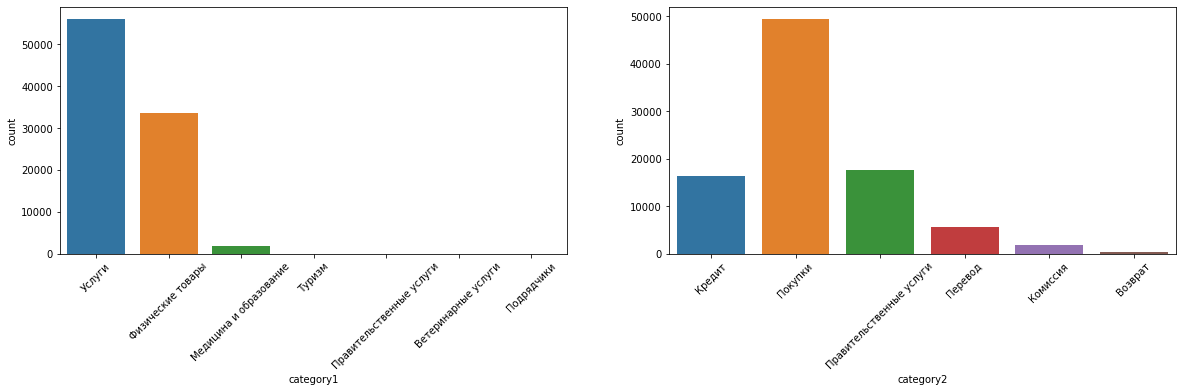

In [19]:
fig = plt.figure(figsize=(20, 10))

axs = []
axs.append(fig.add_subplot(2,2,1))
sns.countplot(x=df.category1)
plt.xticks(rotation=45)


axs.append(fig.add_subplot(2,2,2))
sns.countplot(x=df.category2)
plt.xticks(rotation=45)

## Next step

In [20]:
df['counter'] = 1
data = df[['client_id', 'code', 'type', 'counter']].groupby(['client_id', 'code', 'type']).sum().reset_index().sort_values(by='counter', ascending=False).drop_duplicates('client_id')
data

,client_id,code,type,counter
27485,70780820,6010,7070,2251
29460,76043922,6010,7070,420
34070,87252636,6010,7071,375
11120,29041434,6010,7070,353
11438,29894123,6010,7070,266
...,...,...,...,...
16467,43969966,4814,1030,1
16486,44075338,6011,2010,1
16300,43726510,4814,1030,1
16319,43751504,6011,2010,1


In [21]:
data = data.merge(codes[['code', 'category1']], how='left', on='code')
data = data.merge(types[['type', 'category2']], how='left', on='type')
data = data.merge(df[['net', 'target','client_id']], how='left', on='client_id')

data.drop_duplicates(inplace = True)
data['cat1'] = data['category1'].factorize()[0]
data['cat2'] = data['category2'].factorize()[0]
data

,client_id,code,type,counter,category1,category2,net,target,cat1,cat2
0,70780820,6010,7070,2251,Услуги,Правительственные услуги,0,1.0,0,0
2777,76043922,6010,7070,420,Услуги,Правительственные услуги,0,0.0,0,0
3240,87252636,6010,7071,375,Услуги,Правительственные услуги,1,1.0,0,0
3737,29041434,6010,7070,353,Услуги,Правительственные услуги,1,1.0,0,0
4179,29894123,6010,7070,266,Услуги,Правительственные услуги,1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
91798,43969966,4814,1030,1,Услуги,Покупки,0,1.0,0,3
91801,44075338,6011,2010,1,Услуги,Кредит,1,0.0,0,1
91803,43726510,4814,1030,1,Услуги,Покупки,0,1.0,0,3
91805,43751504,6011,2010,1,Услуги,Кредит,0,0.0,0,1


## Step Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score

model = DecisionTreeClassifier()
X = data[['cat1', 'cat2']]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 888)

In [23]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
data.target.value_counts()

0.0    3340
1.0    2660
Name: target, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.5653333333333334


In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data.rename(columns={'net':'total'}, inplace=True)
sm_cars = smf.ols('target ~ cat1 + cat2', data[['cat1', 'cat2', 'target']]).fit()
sm_cars_params = sm_cars.params
sm_cars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     11.19
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           1.41e-05
Time:                        10:41:47   Log-Likelihood:                -4304.8
No. Observations:                6000   AIC:                             8616.
Df Residuals:                    5997   BIC:                             8636.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4853      0.014     35.908      0.000       0.459       0.512
cat1           0.0584      0.015      3.816      0.000       0.028       0.088
cat2          -0.0292      0.007     -4.383      0.000      -0.042      -0.016
==============================================================================
Omnibus:                    21670.519   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              986.080
Skew:                           0.226   Prob(JB):                    7.51e-215
Kurtosis:                       1.066   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
confusion = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                           columns=["Predicted Yes", " Predicted No"],
                           index=["True Yes", "True No"])
confusion

,Predicted Yes,Predicted No
True Yes,848,1
True No,651,0


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
(y_test==y_pred).sum()/len(y_test)

0.5653333333333334

In [28]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_predicted = rf.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[848,   1],
       [651,   0]])

## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)

knn_pred = clf.predict(X_test)

print(accuracy_score(y_test, knn_pred))

0.474


# Conclusion

### After much deliberation, our feature filtration and modelling brought us to a whopping 57% accuracy. We are not sure what causes such underwhelming results. However, it was an interesting experience, whence we engineered some features, cleaned the dataset, clustered the result and tested our model. If we were to guess, the secret lies in the clustering. It is likely that our way of clustering was not as sophisticated as the model requires it to be.